# Simulating varying head at x=0 using sudden changes of head

The aquifer is considered of constant transmissivity $kD$ and storage coefficient $S$ and to extend from $0 \le x \le \infty$.

The partial differential equation is

$$ kD \frac {\partial^2 s} {\partial x} = S \frac {\partial s} {\partial t}  $$

The solution for a sudden change of head equal to $A [m]$ at $x=0$ and $t = 0$ is

$$ s(x, t) = A \,\mathtt{erfc}(u), \,\,\,\, u=\sqrt{\frac {x^2 S} {4 kD t}} $$

where $\mathtt {erfc} () $ is the so-called complementary error function:

$$ \mathtt {erfc} (z) = \frac 2 {\sqrt {\pi} } \intop _z ^\infty e ^{-y^2}dy $$

And so its derivative is

$$ \frac {d \mathtt{erfc}(z)} {d z} = - \frac 2 {\sqrt {\pi}} e ^{-z^2} $$

Therefore, the discharge equals

$$ Q = -kD \frac {\partial s} {\partial x} = A \sqrt{\frac {kDS} {\pi t}} \mathtt{exp} \left( -u^2 \right) $$

and for $ x = 0 $

$$ Q_0 = A \sqrt{\frac {kD S} {\pi t}}$$

## Superposition

Any varying head can be approximated using a series of constant heads over short time intervals. This allows to use de 1D solution for a sudden head change to simulate the effect on an aquifer of a varying river head. It is assumed that the aquifer is in direct good contact with the surface water at $x=0$.

The superpostion may be written as

$$ s(x, t) = \sum _{i=1} ^{N} \left\{ A_i \mathtt{erfc} 
\sqrt{\frac {x^2 S} {4 kD (t - t_i)}} \right\}, \,\,\, t \ge t_i $$

Clearly, $a$ term $i$ is non-existent when $t < t_i$.

This formula can be computed by looping over the amplituces and times pertaining to each moment on which the amplitude changes.

With a series of amplitudues A, what matters is the change of amplitude. So we need

$$ A = A_0, A_1 - A_0, A_2 - A_1, ... A_n - A_{n-1} $$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

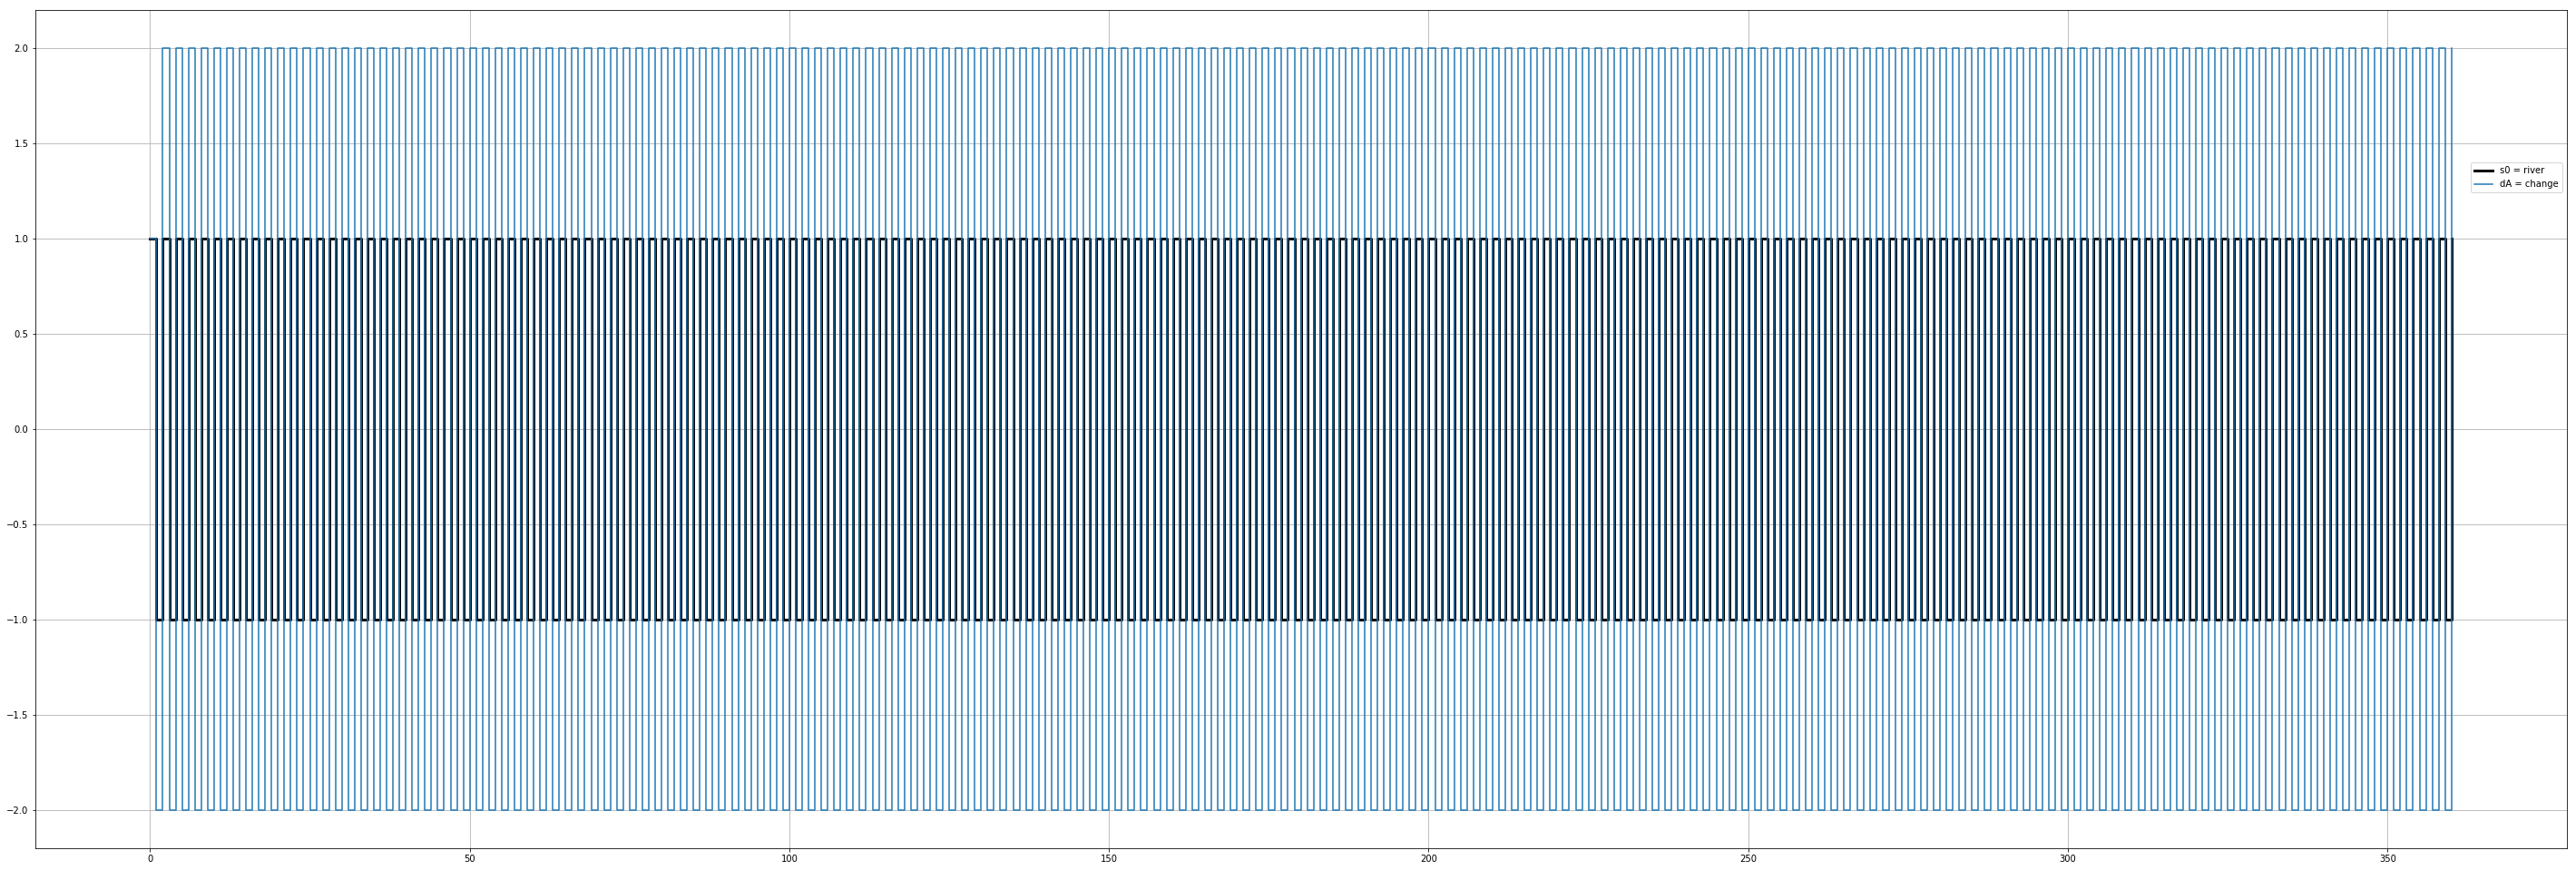

In [98]:
kD = 900 # m2/d
S = 0.1 # [-]
i=-1
s0 =[]   # to define amplitude of the river level change
days = np.linspace(0,360,361)
for t in days:
    A1=i**t
    s0.append(A1)
swt   = np.arange(len(s0)) # switch times
A     = np.hstack((s0[0], np.diff(s0)))

plt.figure(figsize=[50,17])
plt.step(swt, s0, 'k', label="s0 = river", lw=3, where='post')
plt.step(swt, A, label='dA = change', where='post')
plt.grid()
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()


## lets check what will happen because of changing level of river because of sea tide. Lets look on critical point ( x=450 ) and mid of the building pit ( x=425 m) as well as x= 400 m. 

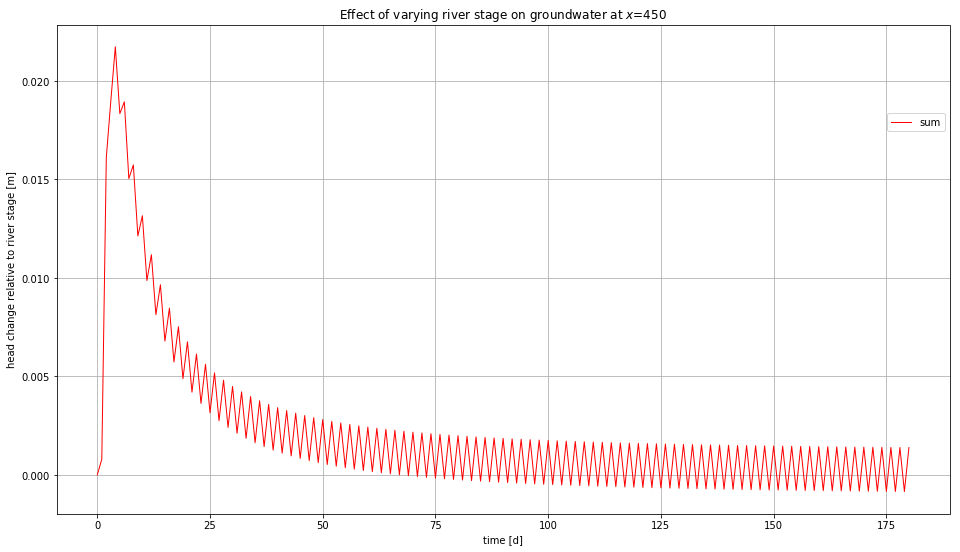

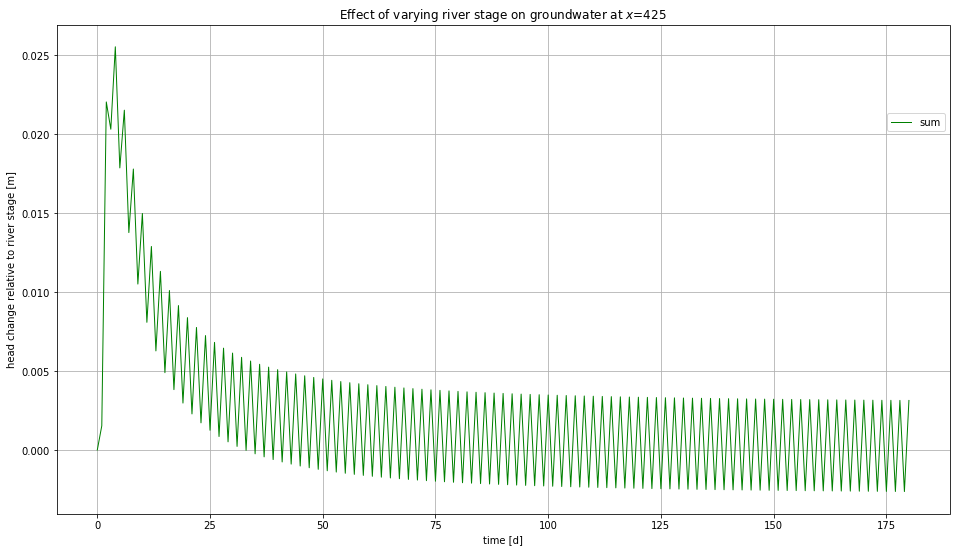

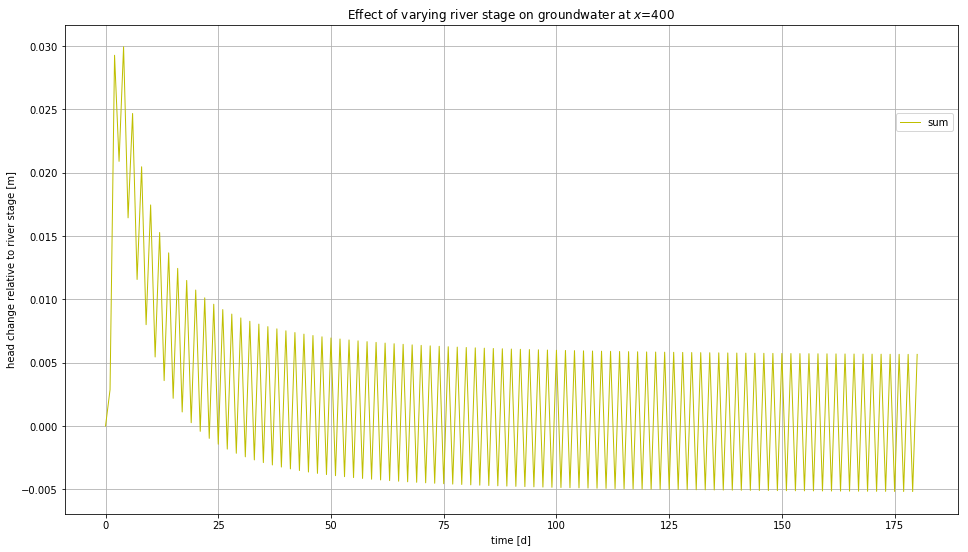

In [102]:
x = 450 # m choose a value for x

t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Effect of varying river stage on groundwater at $x$={:.0f}".format(x))
plt.xlabel('time [d]')
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'r-', label='sum', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()
#-------------------------------------------------------------------------------------------------------------------------#

x = 425 # m choose a value for x

t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Effect of varying river stage on groundwater at $x$={:.0f}".format(x))
plt.xlabel('time [d]')
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'g-', label='sum', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()

#--------------------------------------------------------------------------------------------------------------------------#
x = 400 # m choose a value for x
t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Effect of varying river stage on groundwater at $x$={:.0f}".format(x))
plt.xlabel('time [d]')
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'y-', label='sum', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()


### Conclusion: It is clearly seen that, change in water level will effect more at x=400 m which is the location of extraction well. But, in the critical point the effect of the tide is not as much as x= 400 m. With respect to this reason,  we can say that location of extraction well is  perfect. 

## The discharge at x=0

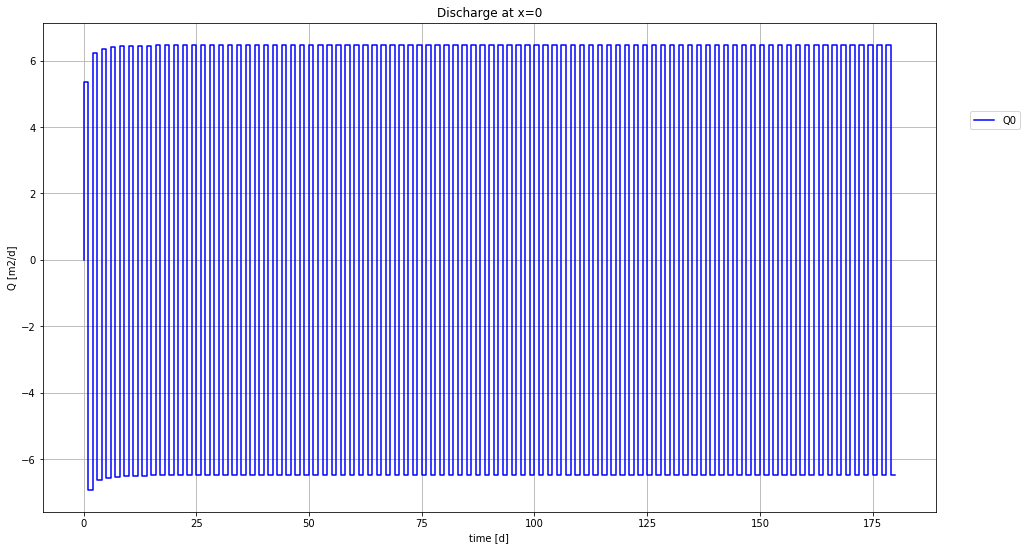

In [84]:

Q0 = np.zeros_like(t)
for ts, a in zip(swt, A):
    Q0[t > ts] += a * np.sqrt(kD * S / (np.pi * (t[t > ts] - ts)) )

plt.figure(figsize=[16,9])
plt.title('Discharge at x=0')
plt.ylabel('Q [m2/d]')
plt.xlabel('time [d]')
plt.grid()
plt.step(t, Q0, 'b', label='Q0')
plt.legend(loc='center right',bbox_to_anchor=(1.1, 0.8))
plt.show()

